In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readData(filename):
    fs = open('dataset/' + filename + '.dat', 'r')    
    
    if filename == 'users':
        data = [line.strip().split('::', 3) for line in fs]
        for record in data:
            del record[-1]      # remove columns occupation and zipcode
    elif filename == 'movies':
        movie = []
        movie_genre = []
        for line in fs:
            parts   = line.strip().split('::')
            movieId = parts[0]
            title   = parts[1]
            genres  = parts[2].split('|')
            for genre in genres:
                movie_genre.append((movieId, genre))
            movie.append((movieId, title))
        data = (movie, movie_genre)
    elif filename == 'ratings':
        data = [line.strip().split('::') for line in fs]
        for record in data:
            del record[-1]      #remove column timestamp
    
    fs.close()                                        
    return data

In [3]:
users          = readData('users')
movies, genres = readData('movies')
ratings        = readData('ratings')

In [4]:
udf = pd.DataFrame({ 'UserID'  : pd.Series(row[0] for row in users),
                     'Gender'  : pd.Series(row[1] for row in users),
                     'Age'     : pd.Series(row[2] for row in users)})
mdf = pd.DataFrame({ 'MovieID' : pd.Series(row[0] for row in movies),
                     'Title'   : pd.Series(row[1] for row in movies)})
gdf = pd.DataFrame({ 'MovieID' : pd.Series(row[0] for row in genres),
                     'Genre'   : pd.Series(row[1] for row in genres)})
rdf = pd.DataFrame({ 'UserID'  : pd.Series(row[0] for row in ratings),
                     'MovieID' : pd.Series(row[1] for row in ratings),
                     'Rating'  : pd.Series(row[2] for row in ratings)})

In [5]:
rdf['Rating'] = rdf['Rating'].astype(int)

In [6]:
joined = pd.merge(pd.merge(pd.merge(udf, rdf, on='UserID'), mdf, on='MovieID'), gdf, on='MovieID')

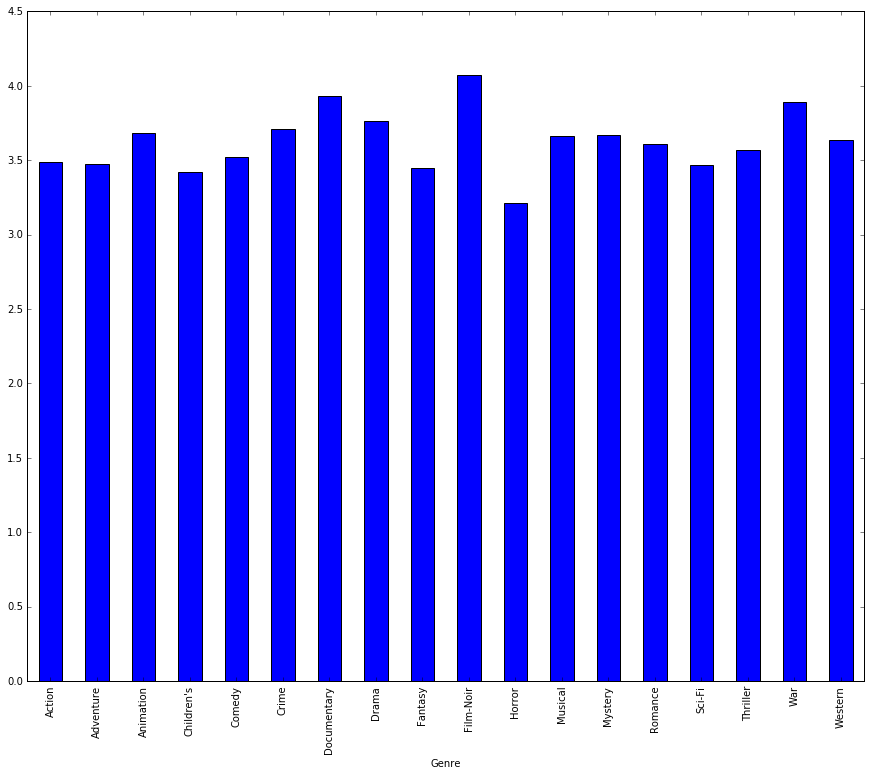

In [7]:
%matplotlib inline

means = joined['Rating'].groupby(joined['Genre']).aggregate(np.mean)
means.plot(kind='bar',figsize=(15,12))

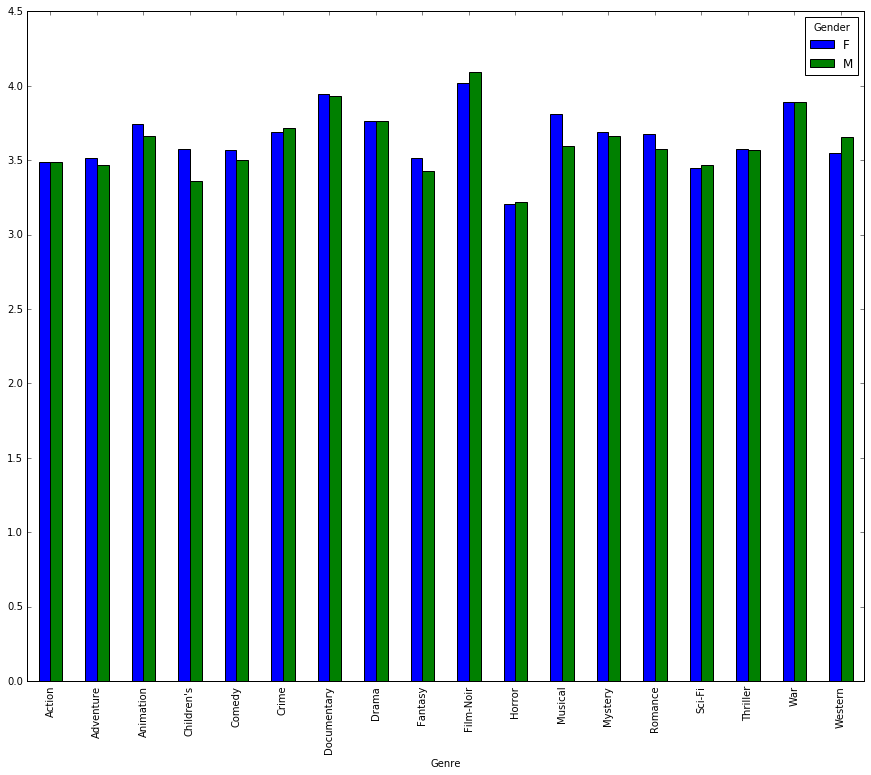

In [8]:
means = joined['Rating'].groupby([joined['Genre'], joined['Gender']]).aggregate(np.mean).unstack()
means.plot(kind='bar',figsize=(15,12))

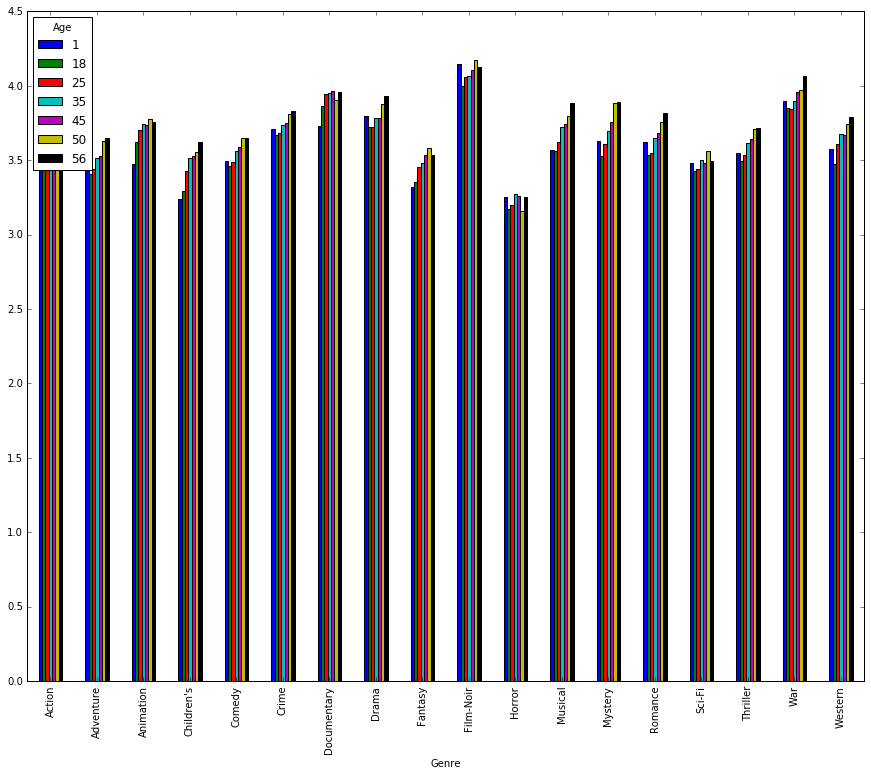

In [9]:
means = joined['Rating'].groupby([joined['Genre'], joined['Age']]).aggregate(np.mean).unstack()
means.plot(kind='bar',figsize=(15,12))